In [1]:
# Import Pandas
import pandas as pd

In [3]:
# Load the datasets
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [4]:
# Check row counts
print("Fake dataset rows:", len(fake))
print("True dataset rows:", len(true))

Fake dataset rows: 23481
True dataset rows: 21417


In [5]:
# Check column names
print("Fake columns:", fake.columns.tolist())
print("True columns:", true.columns.tolist())

Fake columns: ['title', 'text', 'subject', 'date']
True columns: ['title', 'text', 'subject', 'date']


In [6]:
# Add label column
fake['label'] = 0  # Fake = 0
true['label'] = 1

In [7]:
# Merge the datasets
df = pd.concat([fake, true], ignore_index=True)

# Save the merged dataset
df.to_csv("data/news_dataset.csv", index=False)

In [8]:
# Verify the merge
print("Total rows after merge:", len(df))
print("Label distribution:\n", df['label'].value_counts())

Total rows after merge: 44898
Label distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


In [9]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Look at a sample of 5 rows
print("\nSample of merged dataset:\n", df[['title', 'text', 'subject', 'label']].head(5))

Missing values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64

Sample of merged dataset:
                                                title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  label  
0  Donald Trump just couldn t wish all Americans ...    News      0  
1  House Intelligence Committee Chairman Devin Nu...    News      0  
2  On Friday, it was revealed that former Milwauk...    News      0  
3  On Christmas day, Donald Trump announced that ...    News      0  
4  Pope Francis used his annual Christmas Day mes...    News      0  


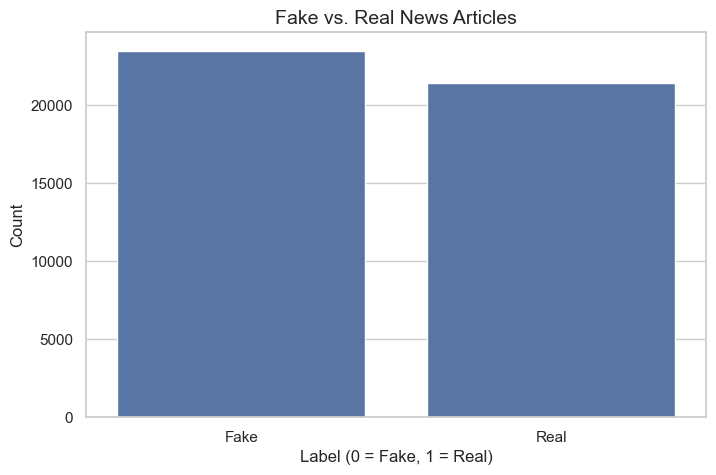

In [10]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Plot label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title("Fake vs. Real News Articles", fontsize=14)
plt.xlabel("Label (0 = Fake, 1 = Real)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Fake', 'Real'])  # Rename 0/1 to Fake/Real
plt.show()

In [11]:
plt.savefig("data/label_distribution.png")

<Figure size 640x480 with 0 Axes>

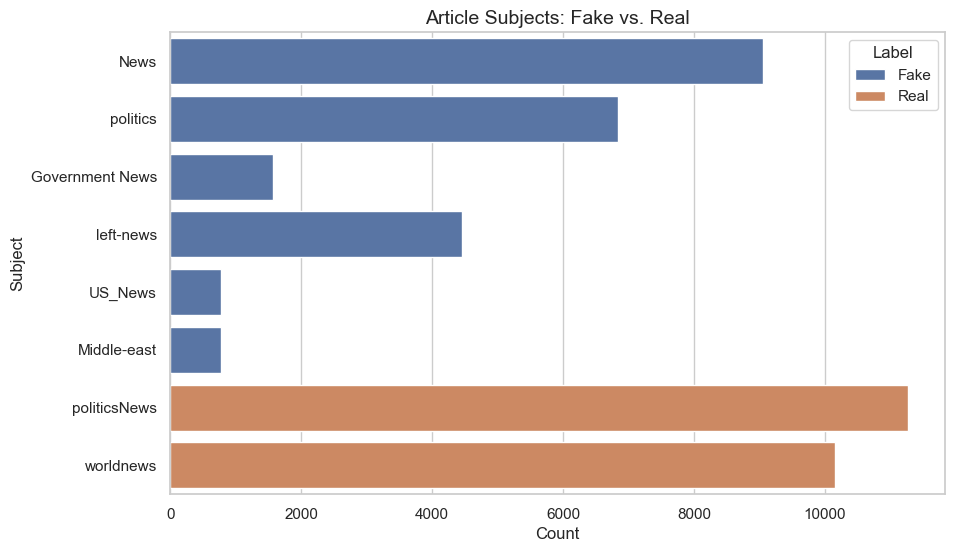

In [12]:
# Plot subject distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='subject', hue='label', data=df)  # y for horizontal bars, hue splits by fake/real
plt.title("Article Subjects: Fake vs. Real", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Subject", fontsize=12)
plt.legend(title="Label", labels=['Fake', 'Real'])
plt.show()

In [13]:
plt.savefig("data/subject_distribution.png")

<Figure size 640x480 with 0 Axes>

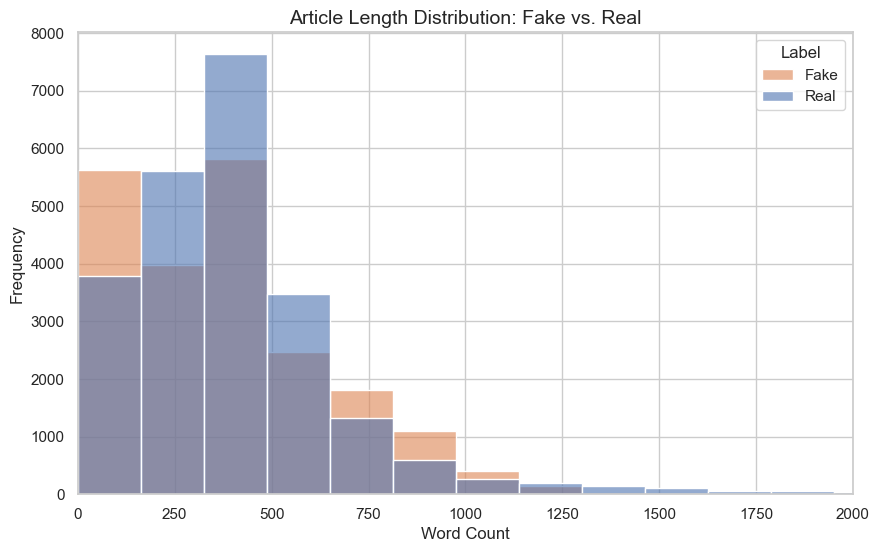

In [20]:
# Calculate word count for each article's text
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot histogram of text lengths by label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, alpha=0.6)
plt.title("Article Length Distribution: Fake vs. Real", fontsize=14)
plt.xlim(0, 2000)  # Adjust as needed
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label", labels=['Fake', 'Real'])
plt.show()

In [21]:
plt.savefig("data/text_length_distribution.png")

<Figure size 640x480 with 0 Axes>

In [23]:
# Import libraries (install wordcloud if needed)
from wordcloud import WordCloud

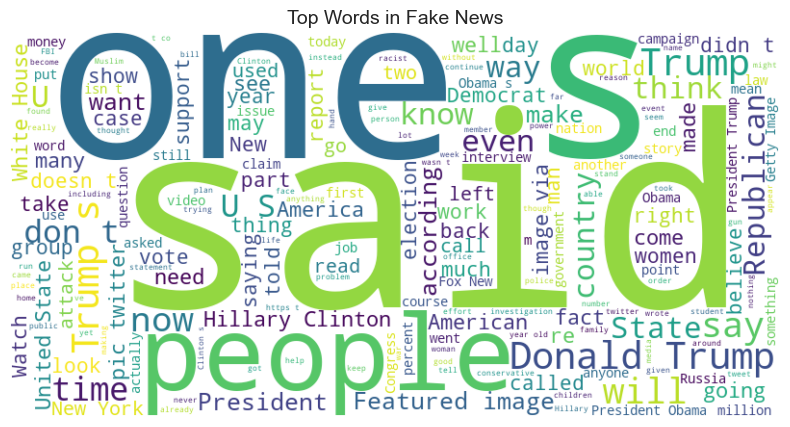

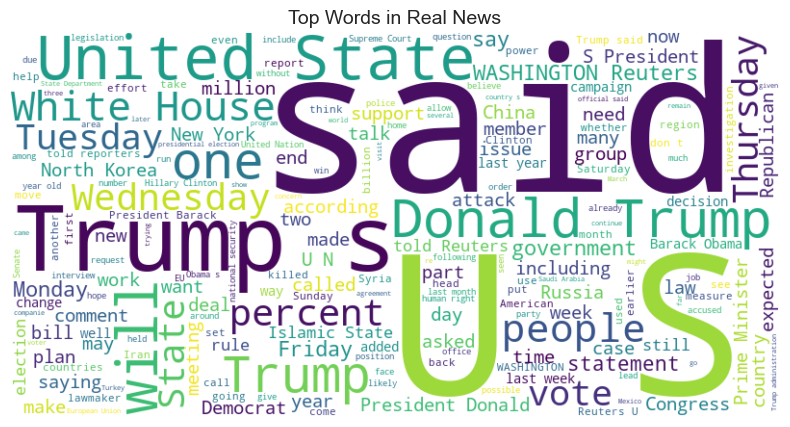

In [24]:
# Split fake and real text
fake_text = " ".join(df[df['label'] == 0]['text'].astype(str))
real_text = " ".join(df[df['label'] == 1]['text'].astype(str))

# Generate word clouds
fake_cloud = WordCloud(width=800, height=400, background_color="white").generate(fake_text)
real_cloud = WordCloud(width=800, height=400, background_color="white").generate(real_text)

# Plot fake word cloud
plt.figure(figsize=(10, 5))
plt.imshow(fake_cloud, interpolation='bilinear')
plt.title("Top Words in Fake News", fontsize=14)
plt.axis("off")
plt.show()

# Plot real word cloud
plt.figure(figsize=(10, 5))
plt.imshow(real_cloud, interpolation='bilinear')
plt.title("Top Words in Real News", fontsize=14)
plt.axis("off")
plt.show()

In [25]:
fake_cloud.to_file("data/fake_wordcloud.png")
real_cloud.to_file("data/real_wordcloud.png")

In [28]:
# Import libraries
import re 

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

In [29]:
# Apply cleaning to the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

In [30]:
# Peek at the result
print("Sample of original vs. cleaned text:")
print(df[['text', 'clean_text']].head(3))

Sample of original vs. cleaned text:
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   

                                          clean_text  
0  donald trump just couldn t wish all americans ...  
1  house intelligence committee chairman devin nu...  
2  on friday it was revealed that former milwauke...  


In [31]:
df.to_csv("data/news_dataset_clean.csv", index=False)

In [50]:
# Import NLTK and download stopwords
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [58]:
# Point NLTK to your project directory's nltk_data folder
project_dir = os.getcwd()  # Gets your current working directory (project_directory)
nltk.data.path.append(os.path.join(project_dir, "nltk_data"))

# Verify files are found
print("Punkt_tab available:", os.path.exists(nltk.data.find('tokenizers/punkt_tab')))
print("Stopwords available:", os.path.exists(nltk.data.find('corpora/stopwords')))

Punkt_tab available: True
Stopwords available: True


In [59]:
# Set stop words
stop_words = set(stopwords.words('english'))

In [60]:
# Function to tokenize and remove stop words
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [61]:
# Apply to clean_text
df['tokens'] = df['clean_text'].apply(preprocess_text)

# Check the result
print("Sample of cleaned text vs. tokens:")
print(df[['clean_text', 'tokens']].head(3))

Sample of cleaned text vs. tokens:
                                          clean_text  \
0  donald trump just couldn t wish all americans ...   
1  house intelligence committee chairman devin nu...   
2  on friday it was revealed that former milwauke...   

                                              tokens  
0  [donald, trump, wish, americans, happy, new, y...  
1  [house, intelligence, committee, chairman, dev...  
2  [friday, revealed, former, milwaukee, sheriff,...  


In [62]:
# Join tokens into a single string
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Count tokens per article
df['token_count'] = df['tokens'].apply(len)

In [63]:
# Check the result
print("Sample of processed text and token counts:")
print(df[['clean_text', 'processed_text', 'token_count']].head(3))

# Basic stats
print("\nToken count stats:")
print(df['token_count'].describe())

Sample of processed text and token counts:
                                          clean_text  \
0  donald trump just couldn t wish all americans ...   
1  house intelligence committee chairman devin nu...   
2  on friday it was revealed that former milwauke...   

                                      processed_text  token_count  
0  donald trump wish americans happy new year lea...          287  
1  house intelligence committee chairman devin nu...          179  
2  friday revealed former milwaukee sheriff david...          339  

Token count stats:
count    44898.000000
mean       233.315782
std        203.310785
min          0.000000
25%        118.000000
50%        205.000000
75%        292.000000
max       4920.000000
Name: token_count, dtype: float64


In [64]:
df.to_csv("data/news_dataset_processed.csv", index=False)

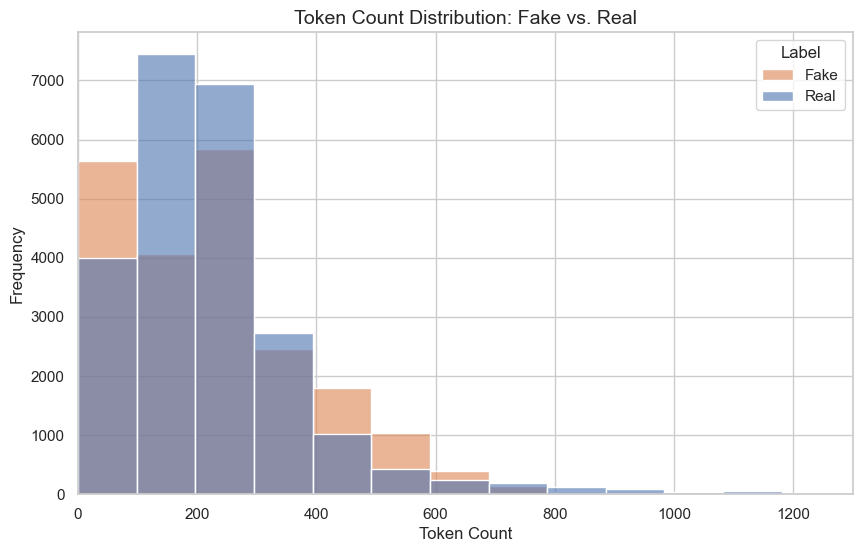

In [68]:
# Plot token count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='token_count', hue='label', bins=50, alpha=0.6)
plt.title("Token Count Distribution: Fake vs. Real", fontsize=14)
plt.xlabel("Token Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label", labels=['Fake', 'Real'])
plt.xlim(0, 1300)  
plt.show()

In [69]:
# Save for presentation
plt.savefig("data/token_count_distribution.png")

<Figure size 640x480 with 0 Axes>

In [70]:
# Import TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words for speed

# Fit and transform processed_text
X = tfidf.fit_transform(df['processed_text'])

# Labels
y = df['label']

In [72]:
# Check the shape and a sample
print("TF-IDF matrix shape:", X.shape)
print("Sample TF-IDF features (first row, first 10 values):")
print(X[0, :10].toarray())
print("Feature names (first 10):", tfidf.get_feature_names_out()[:10])

TF-IDF matrix shape: (44898, 5000)
Sample TF-IDF features (first row, first 10 values):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Feature names (first 10): ['10' '100' '1000' '10000' '100000' '11' '12' '13' '14' '15']


In [73]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (35918, 5000) (35918,)
Testing set shape: (8980, 5000) (8980,)


In [80]:
# Import Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)  # max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
# Predict on test set
y_pred = model.predict(X_test)

In [82]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Baseline Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Baseline Model Accuracy: 0.987750556792873

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4733
        Real       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



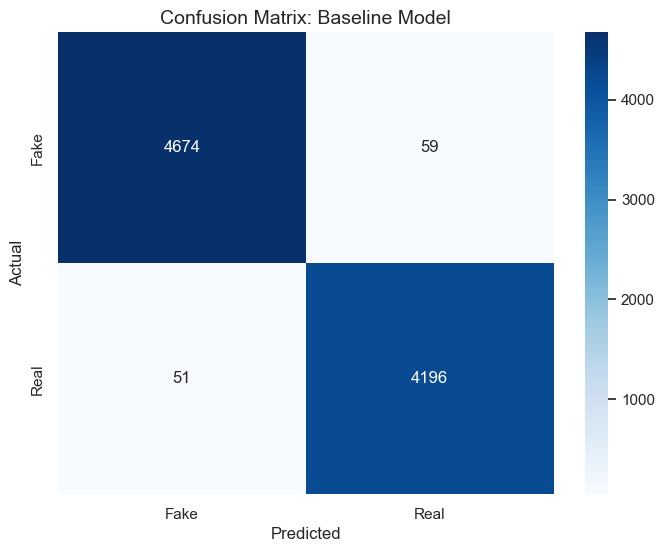

In [83]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix: Baseline Model", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

In [84]:
# Save for presentation
plt.savefig("data/confusion_matrix_baseline.png")

<Figure size 640x480 with 0 Axes>

In [85]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (inverse)
    'penalty': ['l1', 'l2'],   # L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear']    # Works with l1 and l2
}

# Initialize model
base_model = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [86]:
# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict and evaluate on test set
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Test Accuracy:", accuracy_tuned)
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Fake', 'Real']))

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9954340775221873
Tuned Model Test Accuracy: 0.9957683741648107

Tuned Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4733
        Real       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [88]:
# Save the tuned model
import joblib
joblib.dump(best_model, "model/tuned_logreg_model.pkl")

['model/tuned_logreg_model.pkl']

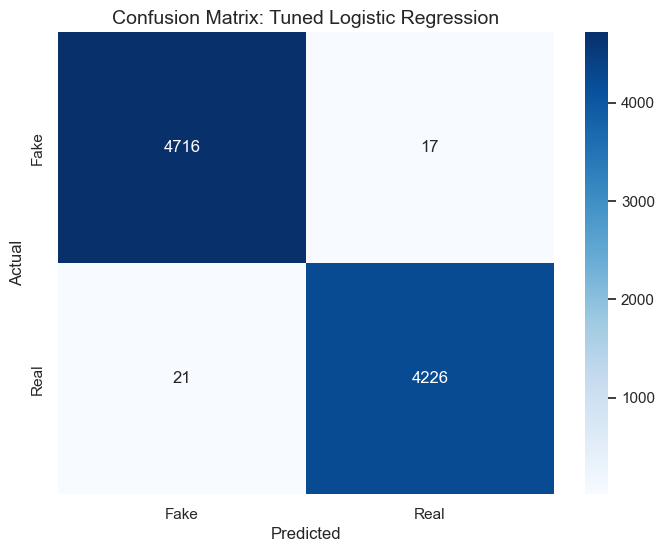

<Figure size 640x480 with 0 Axes>

In [89]:
# Compute confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix: Tuned Logistic Regression", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Save for presentation
plt.savefig("data/confusion_matrix_tuned.png")

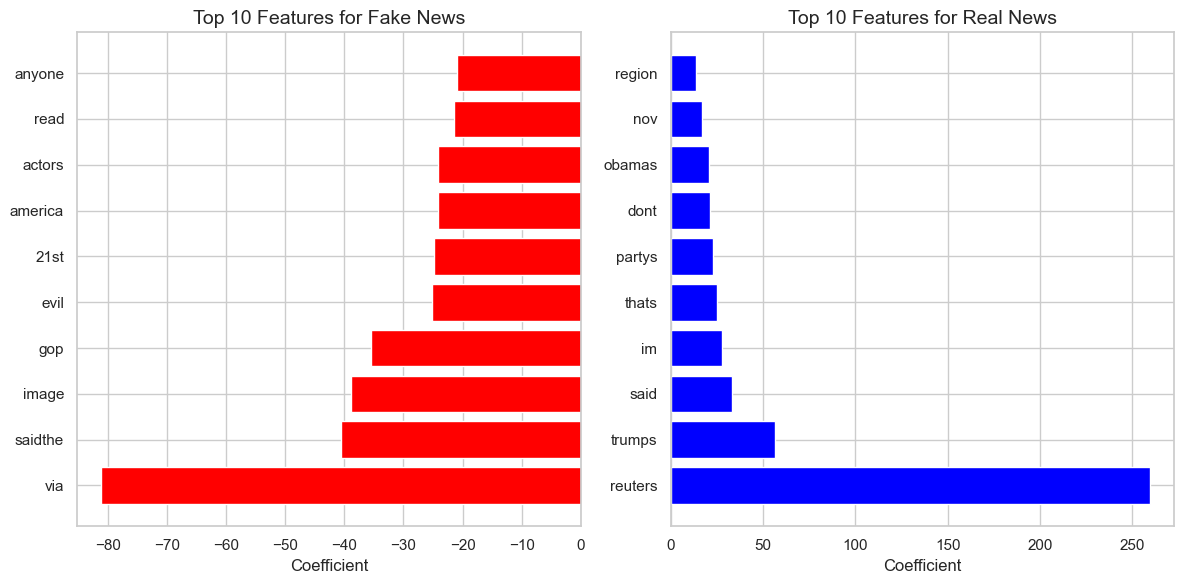

Top 10 Fake News Features: [('via', np.float64(-81.08309738775455)), ('saidthe', np.float64(-40.554080916766296)), ('image', np.float64(-38.92689903504856)), ('gop', np.float64(-35.47898130993349)), ('evil', np.float64(-25.150708843134215)), ('21st', np.float64(-24.75828274823046)), ('america', np.float64(-24.193258764904986)), ('actors', np.float64(-24.11348823899493)), ('read', np.float64(-21.410722657305495)), ('anyone', np.float64(-20.858425902690666))]
Top 10 Real News Features: [('reuters', np.float64(259.65680588280225)), ('trumps', np.float64(56.72990404878222)), ('said', np.float64(33.38694602102262)), ('im', np.float64(27.867717467618547)), ('thats', np.float64(25.28505430557345)), ('partys', np.float64(23.035571118621608)), ('dont', np.float64(21.303444039786303)), ('obamas', np.float64(20.641003717690776)), ('nov', np.float64(17.106570294001532)), ('region', np.float64(13.899015295230047))]


<Figure size 640x480 with 0 Axes>

In [90]:
# Import libraries
import numpy as np

# Get feature names from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Get tuned model coefficients
coef = best_model.coef_[0]  # Coefs from tuned Logistic Regression

# Top 10 features for Fake (negative coefs) and Real (positive coefs)
top_fake_idx = np.argsort(coef)[:10]  # Lowest coefs = strong Fake predictors
top_real_idx = np.argsort(coef)[-10:][::-1]  # Highest coefs = strong Real predictors

# Extract features and coefficients
top_fake_features = feature_names[top_fake_idx]
top_fake_coefs = coef[top_fake_idx]
top_real_features = feature_names[top_real_idx]
top_real_coefs = coef[top_real_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_fake_features, top_fake_coefs, color='red')
plt.title("Top 10 Features for Fake News", fontsize=14)
plt.xlabel("Coefficient", fontsize=12)
plt.subplot(1, 2, 2)
plt.barh(top_real_features, top_real_coefs, color='blue')
plt.title("Top 10 Features for Real News", fontsize=14)
plt.xlabel("Coefficient", fontsize=12)
plt.tight_layout()
plt.show()

# Save for presentation
plt.savefig("data/feature_importance_tuned.png")

# Print top features
print("Top 10 Fake News Features:", list(zip(top_fake_features, top_fake_coefs)))
print("Top 10 Real News Features:", list(zip(top_real_features, top_real_coefs)))